In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import os

In [3]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\Car Dekho Selling Price Prediction")
df = pd.read_csv("CDSPP_FT.csv")
df

,year,transmission_le,Dealer,Individual,CNG,Diesel,LPG,Petrol,name,selling_price
0,-1.719855,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-1.584550,60000.0
1,-1.719855,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-1.317189,135000.0
2,-0.374549,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,0.531741,600000.0
3,0.970757,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-0.857949,250000.0
4,0.163574,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,0.744510,450000.0
...,...,...,...,...,...,...,...,...,...,...
4335,0.163574,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,-0.104540,409999.0
4336,0.163574,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,0.044158,409999.0
4337,-1.181733,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-1.609009,110000.0
4338,0.701696,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,1.773522,865000.0


## Seperating dependent and independent variables

In [4]:
X = df.iloc[:,:-1].values
X

array([[-1.71985501,  0.33927557, -0.54504232, ..., -0.0729916 ,
         1.02189871, -1.58455044],
       [-1.71985501,  0.33927557, -0.54504232, ..., -0.0729916 ,
         1.02189871, -1.31718903],
       [-0.37454887,  0.33927557, -0.54504232, ..., -0.0729916 ,
        -0.97857057,  0.53174125],
       ...,
       [-1.18173255,  0.33927557, -0.54504232, ..., -0.0729916 ,
         1.02189871, -1.60900938],
       [ 0.70169604,  0.33927557, -0.54504232, ..., -0.0729916 ,
        -0.97857057,  1.77352156],
       [ 0.70169604,  0.33927557, -0.54504232, ..., -0.0729916 ,
         1.02189871, -0.60209062]])

In [5]:
Y = df.iloc[:,-1].values
Y

array([ 60000., 135000., 600000., ..., 110000., 865000., 225000.])

## Test and Train spliting of data

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

## Selecting Model

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train, Y_train)
lr_score = str(r2_score(Y_test,reg.predict(X_test)))
print("Linear Regression: "+lr_score)

Linear Regression: 0.7323919717461974


### Decision Tree Regressor

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dt =DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train,Y_train)
dt_score = str(r2_score(Y_test,dt.predict(X_test)))
print("Decision Tree Regressor: "+dt_score)

Decision Tree Regressor: 0.7199627508607279


### Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
random_reg= RandomForestRegressor (n_estimators =100)
random_reg.fit(X_train,Y_train)
rfr_score = str(r2_score(Y_test,random_reg.predict(X_test)))
print("Random Forest Regressor: "+rfr_score)

Random Forest Regressor: 0.783252078637896


### Polynomial Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# define the pipeline and train model
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
                  
model.fit(X_train, Y_train)

# print out regression coefficients
# print(model.named_steps['linear'].coef_)    
# print(model.named_steps['linear'].intercept_)  
pr_score = str(r2_score(Y_test,model.predict(X_test)))
print("Polynomial Regression: "+pr_score)

Polynomial Regression: 0.7484567579169872


### RANSAC Regressor

In [11]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score
ransac = RANSACRegressor(LinearRegression(),max_trials=4,min_samples=2,loss='absolute_loss',residual_threshold=10)
ransac.fit(X_train, Y_train)
RANSAC_score = str(r2_score(Y_test,ransac.predict(X_test)))
print("RANSAC Regressor: "+RANSAC_score)

RANSAC Regressor: -0.9739685956336603


C:\Users\Nilesh\anaconda3\lib\site-packages\sklearn\linear_model\_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


 ### Support Vector Regression (SVR)

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')
svr_rbf.fit(X_train, Y_train)
svr_score = str(r2_score(Y_test,svr_rbf.predict(X_test)))
print("Support Vector Regression (SVR): "+svr_score)

Support Vector Regression (SVR): -0.03787249473784837


## Hyperparameter Tuning

### Random Forest

In [13]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [14]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [15]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   3.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   2.9s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1800; total time=   3.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1600; total time=   3.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1600; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1600; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1600; total time=   2.5s
[CV] END bootstrap=False, ma

[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   1.7s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   0.7s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, 

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.4s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [16]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [17]:
rf_random_score = str(r2_score(Y_test,rf_random.predict(X_test)))
print("Random Forest(After Hyper Tuning): "+rf_random_score)

Random Forest(After Hyper Tuning): 0.7819483096663358


## Checking Results

In [18]:
rf_random.predict(X_test)

array([641937.22101539, 493776.87637849, 739218.4000245 , ...,
       700774.08450369, 225832.28419329, 806367.17761013])

In [19]:
Y_test

array([ 700000.,  425000., 1075000., ...,  749000.,  150000.,  950000.])

In [20]:
df.head(5).values

array([[-1.71985501e+00,  3.39275572e-01, -5.45042319e-01,
         5.81252527e-01, -9.64485644e-02, -9.92196346e-01,
        -7.29916017e-02,  1.02189871e+00, -1.58455044e+00,
         6.00000000e+04],
       [-1.71985501e+00,  3.39275572e-01, -5.45042319e-01,
         5.81252527e-01, -9.64485644e-02, -9.92196346e-01,
        -7.29916017e-02,  1.02189871e+00, -1.31718903e+00,
         1.35000000e+05],
       [-3.74548868e-01,  3.39275572e-01, -5.45042319e-01,
         5.81252527e-01, -9.64485644e-02,  1.00786503e+00,
        -7.29916017e-02, -9.78570570e-01,  5.31741247e-01,
         6.00000000e+05],
       [ 9.70757270e-01,  3.39275572e-01, -5.45042319e-01,
         5.81252527e-01, -9.64485644e-02, -9.92196346e-01,
        -7.29916017e-02,  1.02189871e+00, -8.57949297e-01,
         2.50000000e+05],
       [ 1.63573587e-01,  3.39275572e-01, -5.45042319e-01,
         5.81252527e-01, -9.64485644e-02,  1.00786503e+00,
        -7.29916017e-02, -9.78570570e-01,  7.44509860e-01,
         4.

In [21]:
val = np.array([[9.70757270e-01,  3.39275572e-01, -5.45042319e-01,
         5.81252527e-01, -9.64485644e-02, -9.92196346e-01,
        -7.29916017e-02,  1.02189871e+00, -8.57949297e-01]])

In [22]:
res = 2.50000000e+05
print("Actual result: "+str(res))

Actual result: 250000.0


In [23]:
pred = rf_random.predict(val)
print("Predicted result: "+str(pred[0]))

Predicted result: 229685.30015883167


## Visualizing Results

In [24]:
pred = rf_random.predict(X_test)

C:\Users\Nilesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


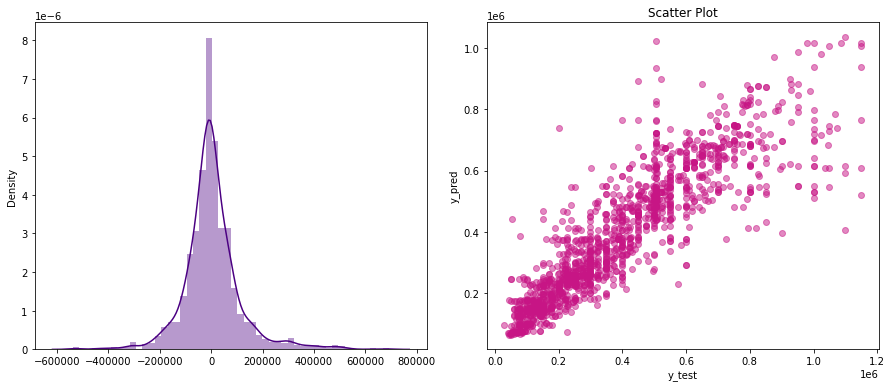

In [25]:
plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)
plt.title("Dist Plot")
sns.distplot(Y_test-pred,ax=axis[0], color="INDIGO")
plt.title("Scatter Plot")
plt.scatter(Y_test,pred, alpha=0.5, color="MEDIUMVIOLETRED")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Save the moel to reuse it again

In [26]:
import pickle
file = open('CDSPP_rf.pkl','wb')
pickle.dump(rf_random, file)

In [27]:
model = open('CDSPP_rf.pkl','rb')
CDSPP__rf = pickle.load(model)

In [28]:
Y_prediction = CDSPP__rf.predict(X_test)

In [29]:
CDSPP_score = str(r2_score(Y_test,Y_prediction))
print("Random Forest Regression with hypertuning: "+ str(CDSPP_score))

Random Forest Regression with hypertuning: 0.7819483096663358
